# Importing Library

In [4]:
import pandas as pd
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("C:\\Users\\Hp\\Downloads\\Zoo.csv")

In [6]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# problem

Implement a KNN model to classify the animals in to categorie

In [8]:
df.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

# Data Exploration and Visualization

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [34]:
for i in df.columns :
    print(i , '\n', df[i].value_counts())

animal name 
 frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64
hair 
 0    58
1    43
Name: hair, dtype: int64
feathers 
 0    81
1    20
Name: feathers, dtype: int64
eggs 
 1    59
0    42
Name: eggs, dtype: int64
milk 
 0    60
1    41
Name: milk, dtype: int64
airborne 
 0    77
1    24
Name: airborne, dtype: int64
aquatic 
 0    65
1    36
Name: aquatic, dtype: int64
predator 
 1    56
0    45
Name: predator, dtype: int64
toothed 
 1    61
0    40
Name: toothed, dtype: int64
backbone 
 1    83
0    18
Name: backbone, dtype: int64
breathes 
 1    80
0    21
Name: breathes, dtype: int64
venomous 
 0    93
1     8
Name: venomous, dtype: int64
fins 
 0    84
1    17
Name: fins, dtype: int64
legs 
 4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64
tail 
 1    75
0    26
Name: tail, dtype: int64
domestic 
 0    88
1   

In [40]:
df['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [35]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [36]:
df.shape

(101, 18)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


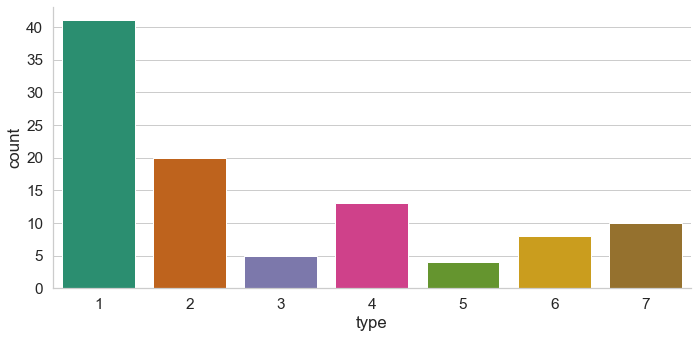

In [39]:
sns.set(style = 'whitegrid', font_scale = 1.4)
sns.catplot('type', data=df, kind="count",height = 5,aspect = 2, palette="Dark2")
plt.show()

In [41]:
# find categorical and numeric variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n', categorical)
print('\n')
numeric = [var for var in df.columns if df[var].dtype!='O']
print('There are {} Numeric variables\n'.format(len(numeric)))
print('The Numeric variables are :\n', numeric)

There are 1 categorical variables

The categorical variables are :
 ['animal name']


There are 17 Numeric variables

The Numeric variables are :
 ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<Figure size 432x288 with 0 Axes>

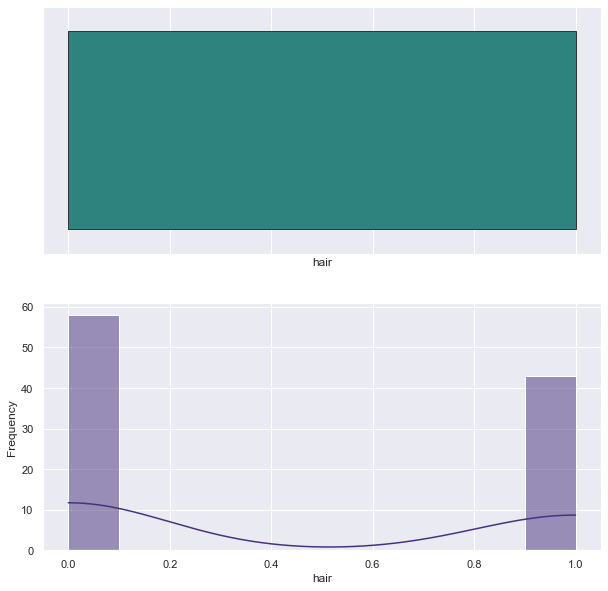

<Figure size 720x720 with 0 Axes>

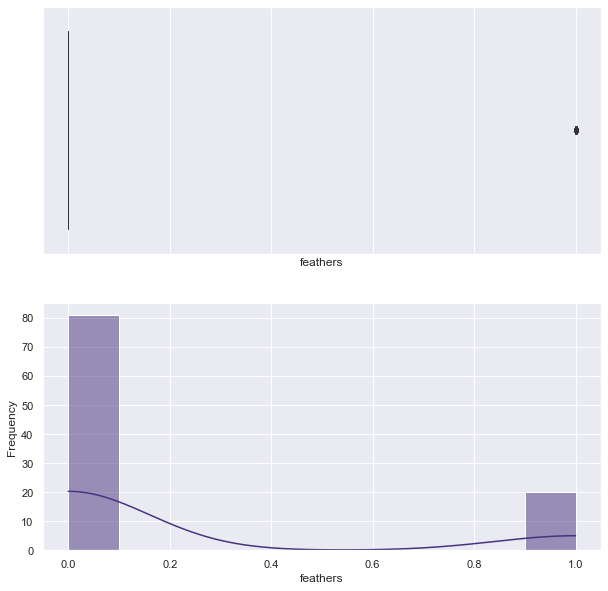

<Figure size 720x720 with 0 Axes>

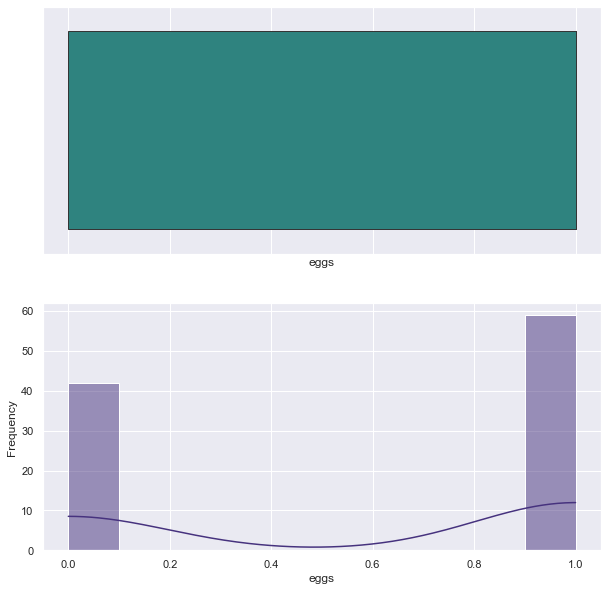

<Figure size 720x720 with 0 Axes>

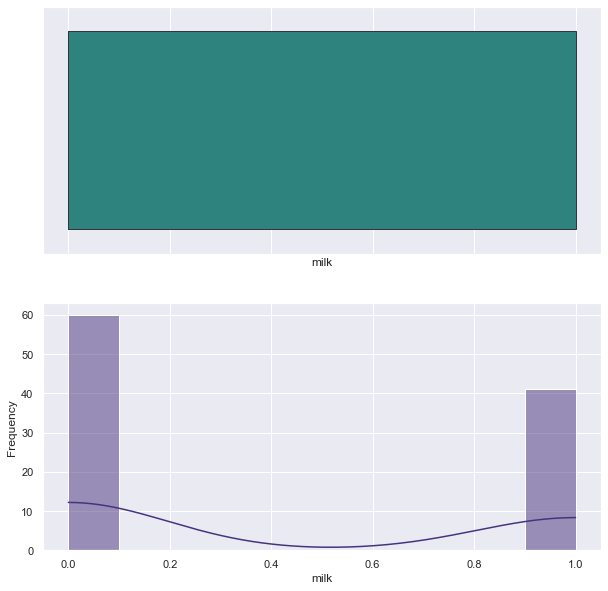

<Figure size 720x720 with 0 Axes>

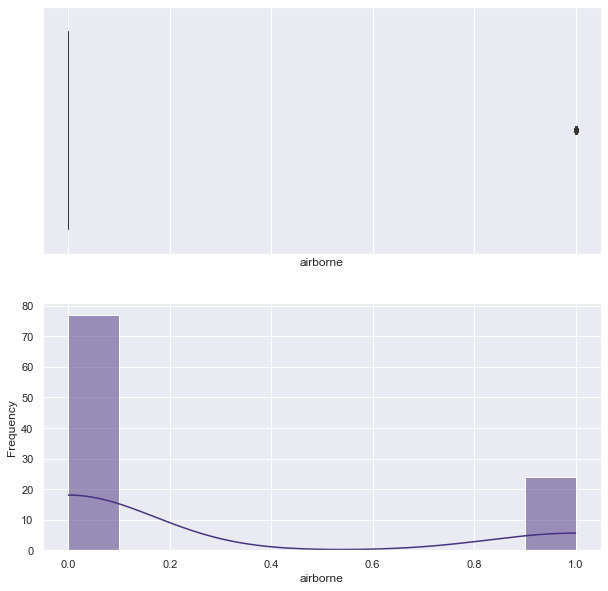

<Figure size 720x720 with 0 Axes>

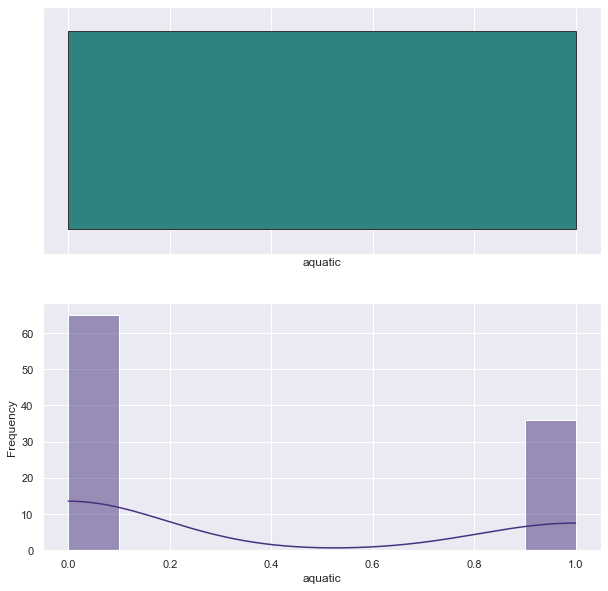

<Figure size 720x720 with 0 Axes>

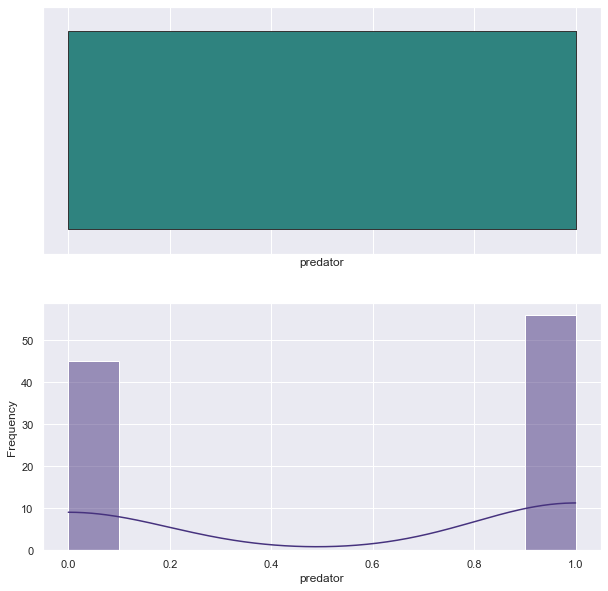

<Figure size 720x720 with 0 Axes>

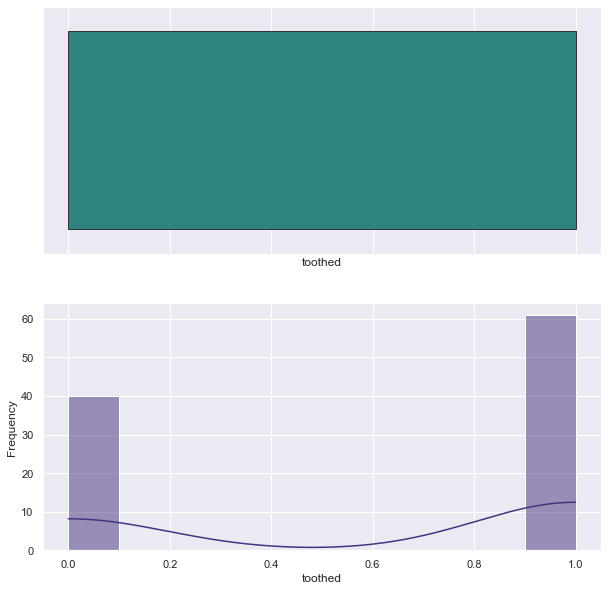

<Figure size 720x720 with 0 Axes>

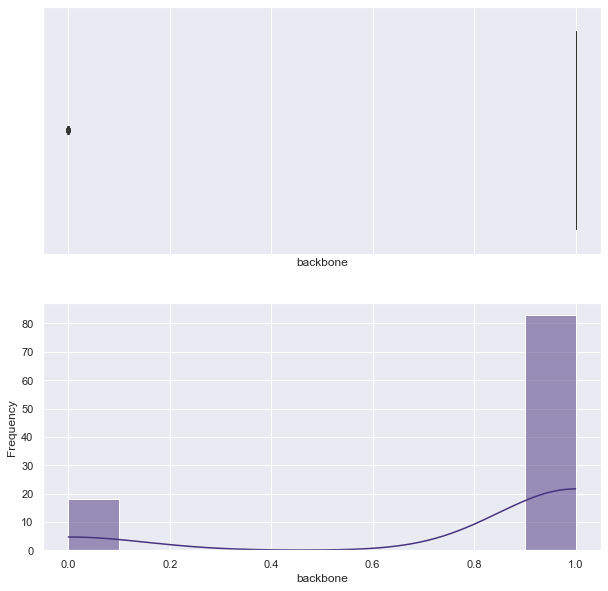

<Figure size 720x720 with 0 Axes>

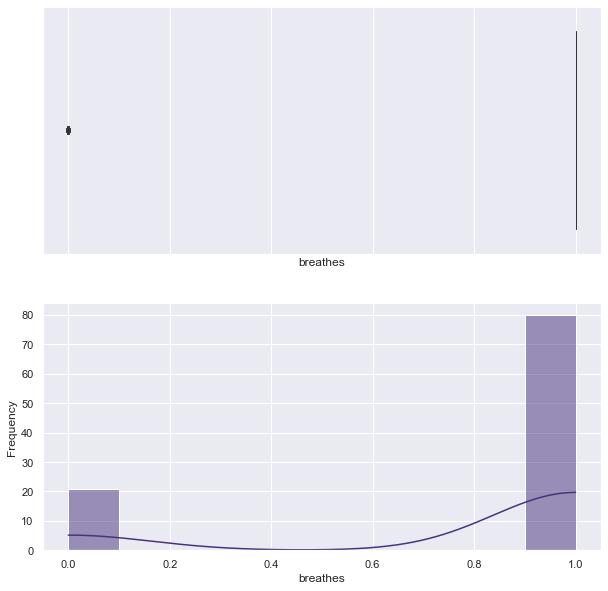

<Figure size 720x720 with 0 Axes>

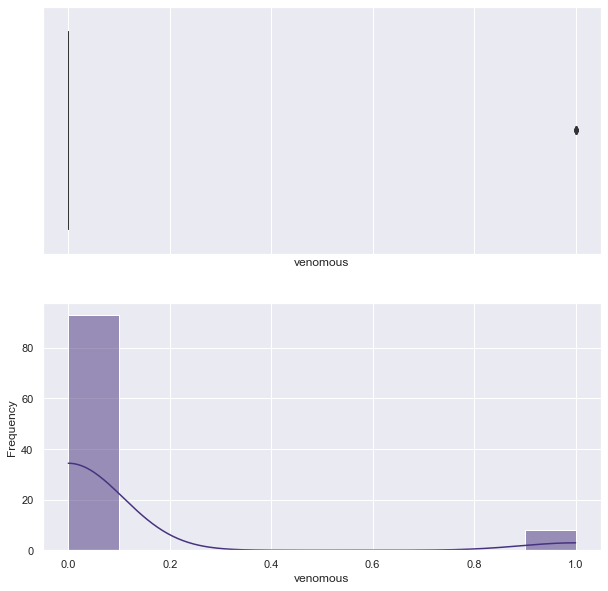

<Figure size 720x720 with 0 Axes>

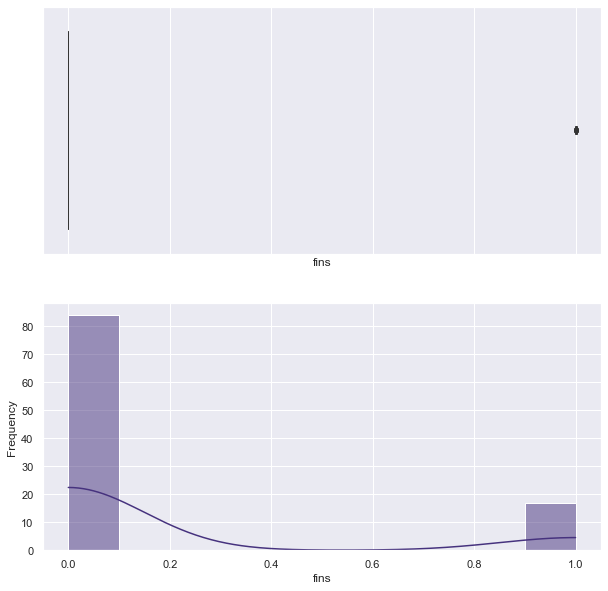

<Figure size 720x720 with 0 Axes>

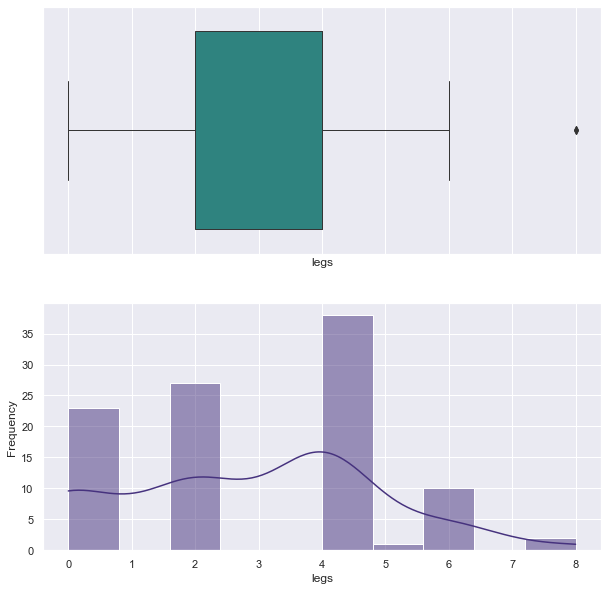

<Figure size 720x720 with 0 Axes>

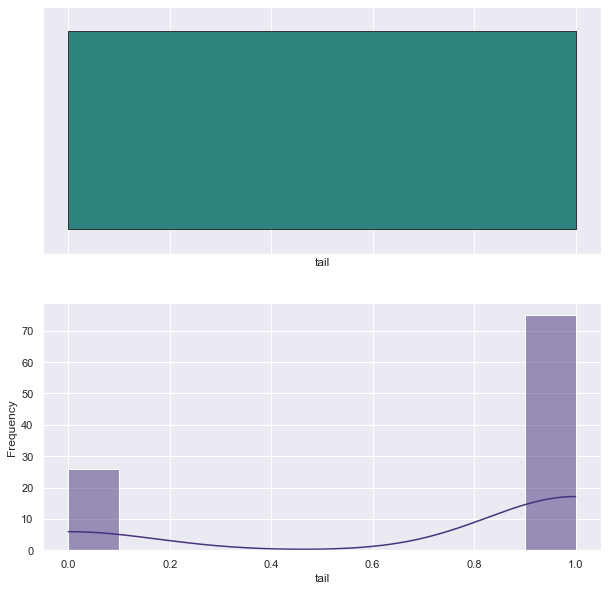

<Figure size 720x720 with 0 Axes>

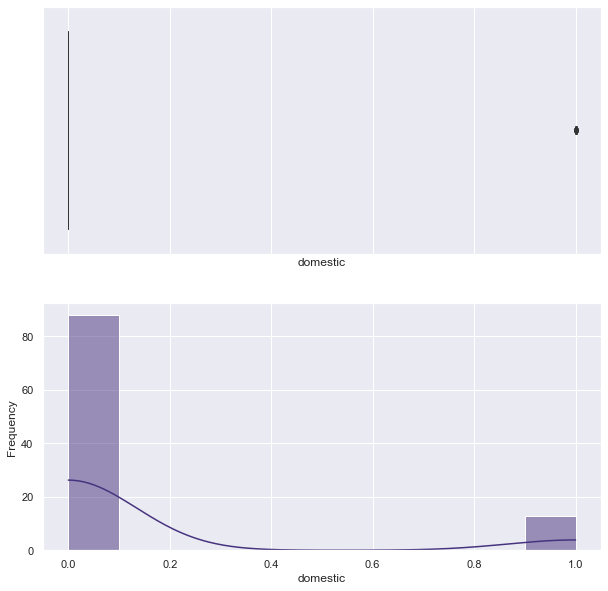

<Figure size 720x720 with 0 Axes>

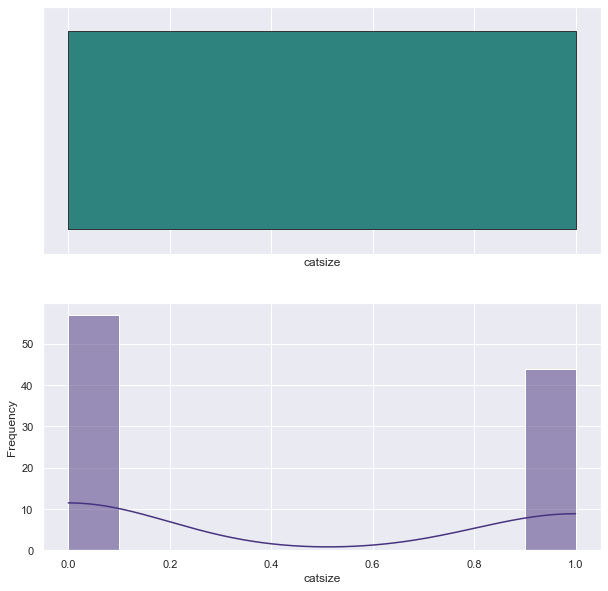

<Figure size 720x720 with 0 Axes>

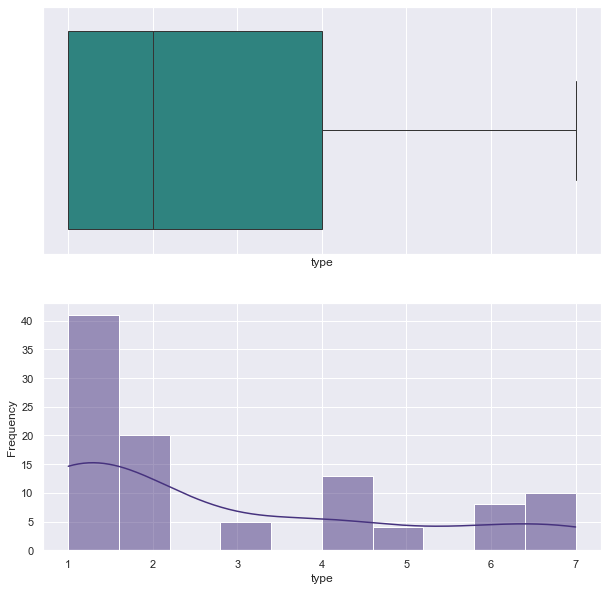

In [42]:
for i in numeric:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 10)}, palette="viridis")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0, palette="viridis")
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True, palette="viridis")

# correlation plot

<AxesSubplot:>

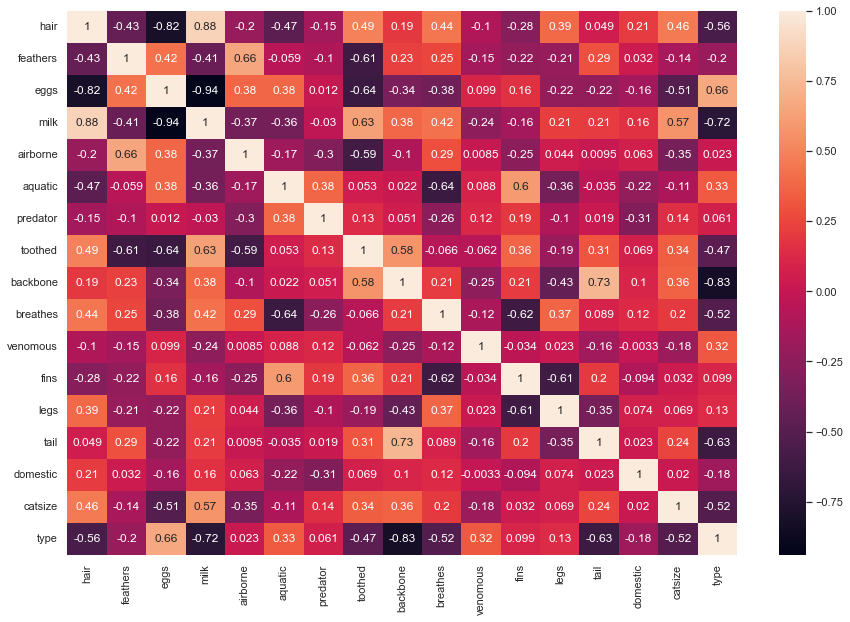

In [43]:
x=df.iloc[:,1:17]
y=df.iloc[:,-1]

import seaborn as sns
# correlation matrix

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

# pairwise plot of all the feature

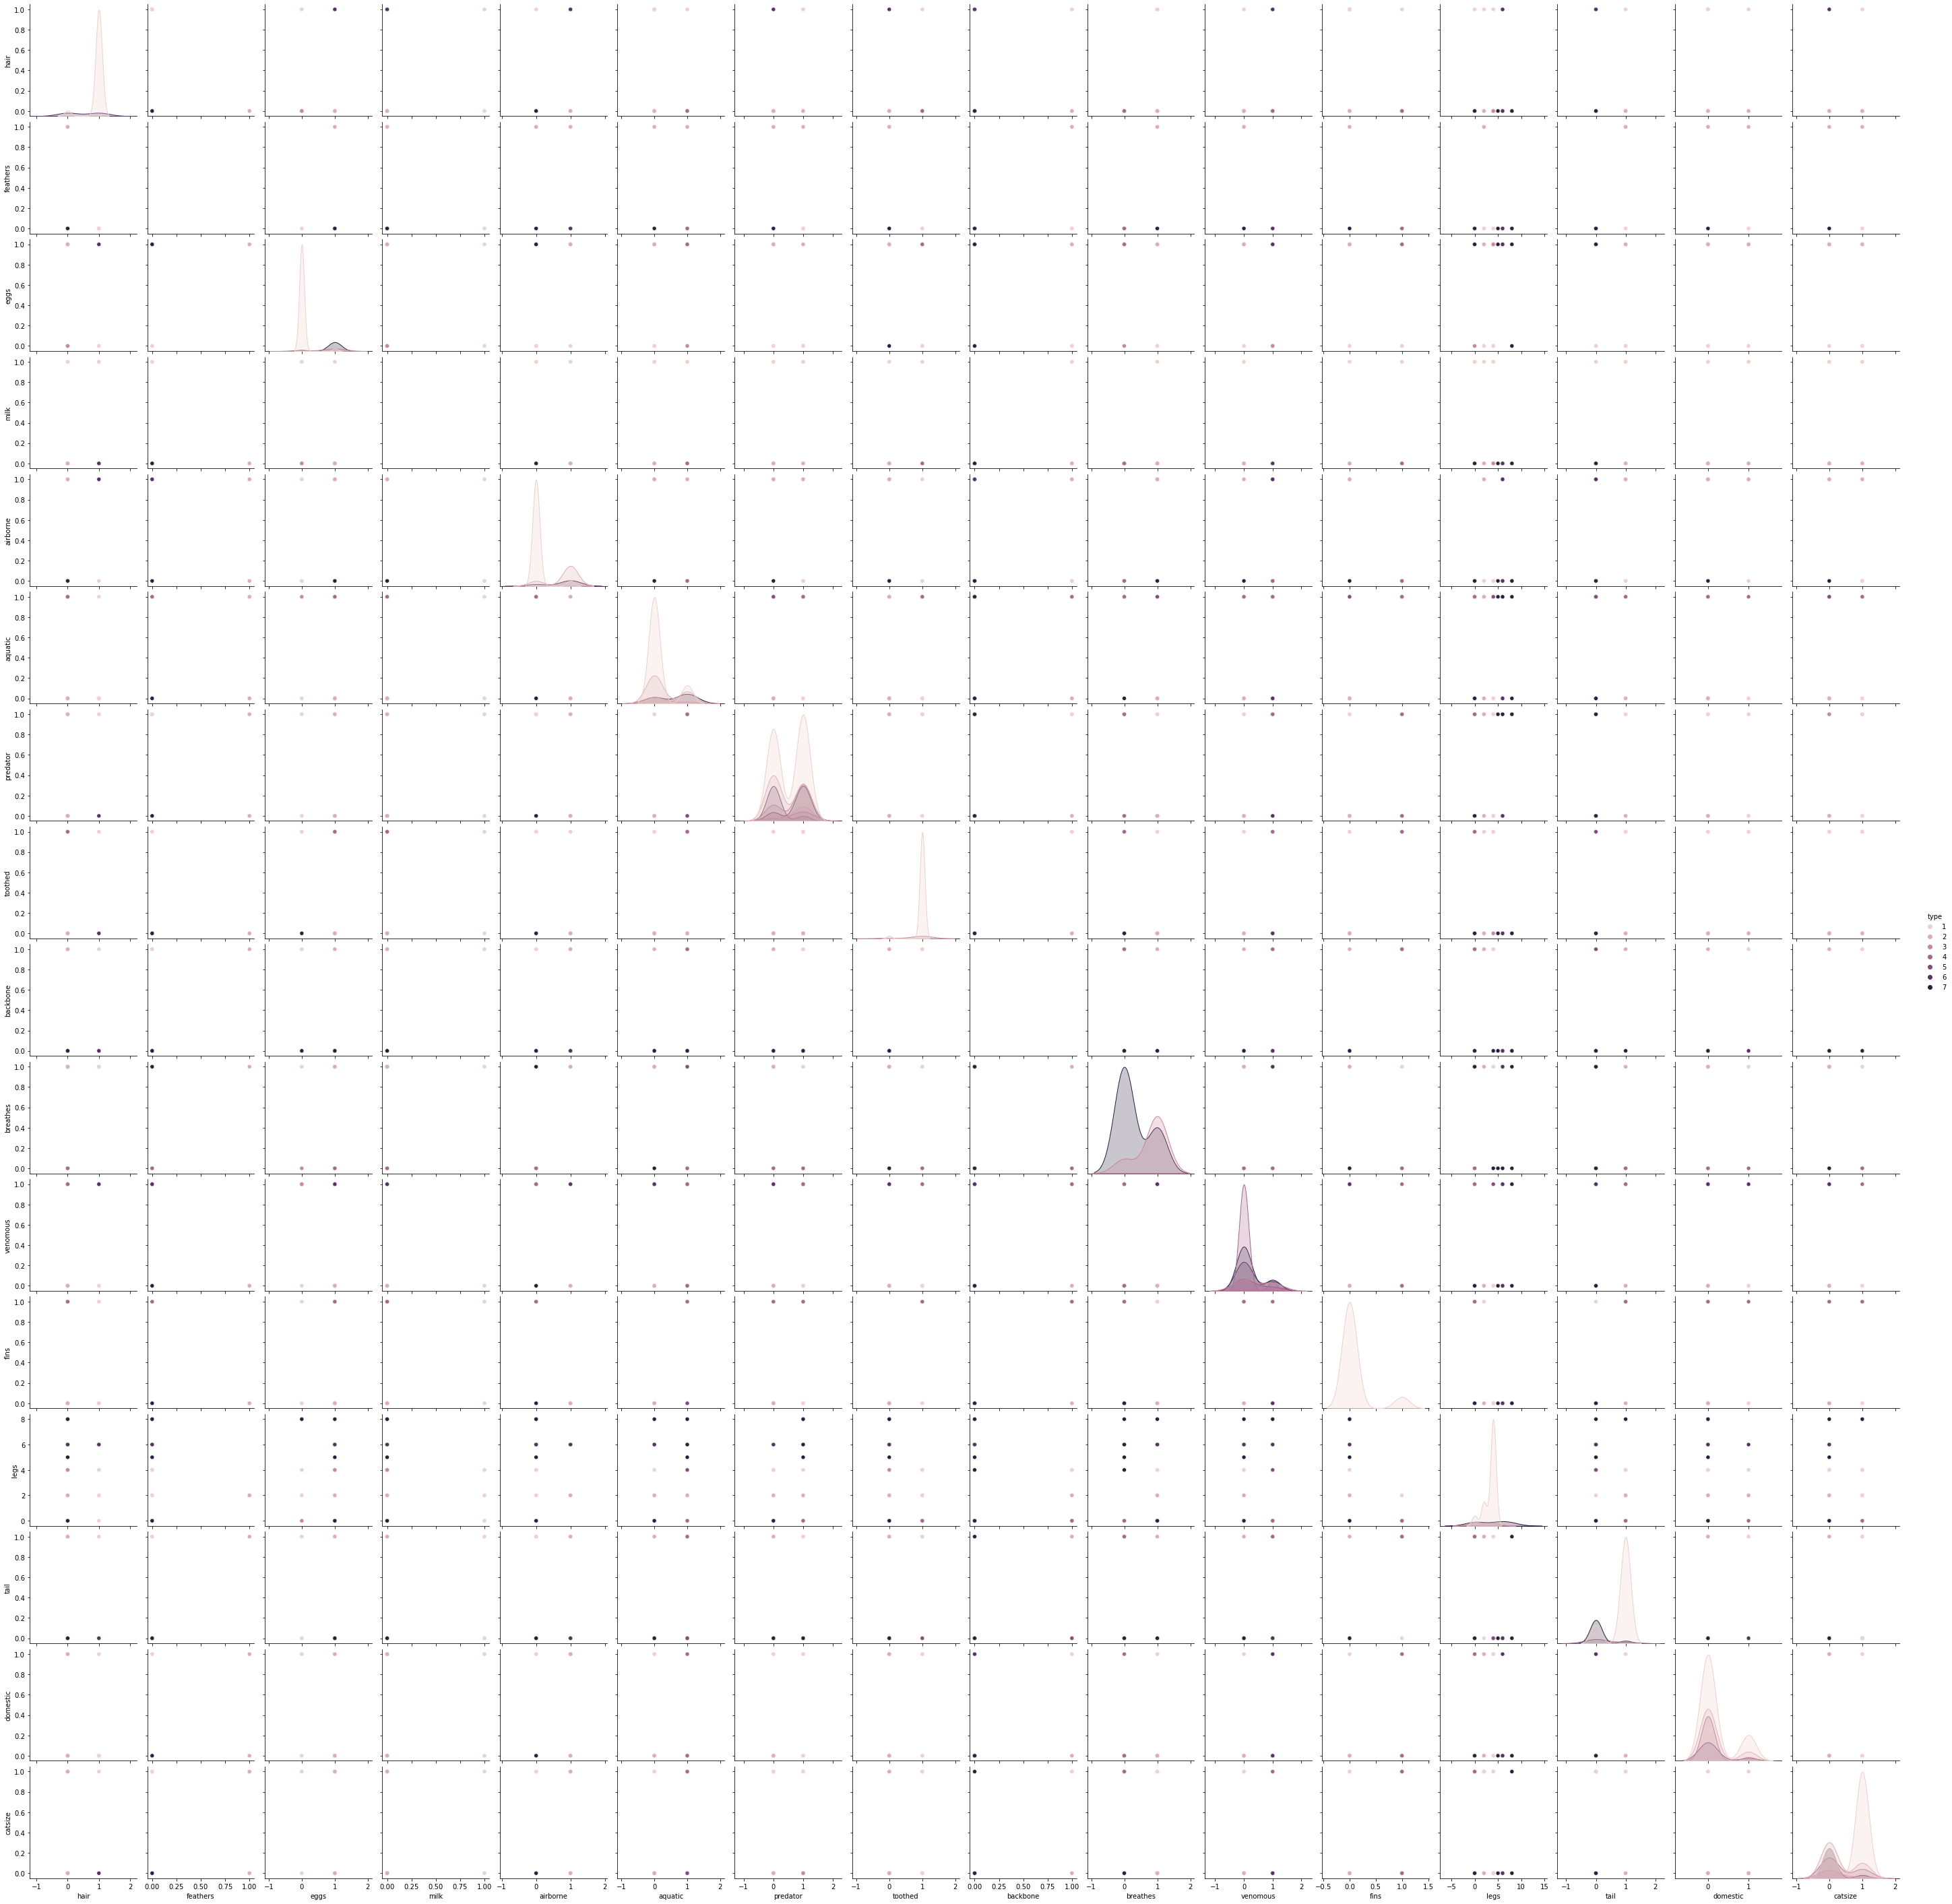

<Figure size 720x360 with 0 Axes>

In [23]:

sns.pairplot(df,hue='type')
plt.figure(figsize=(10,5))
plt.show()

In [50]:

color_list = [("red" if i ==1 else "blue" if i ==0 else "yellow" ) for i in df.hair]

In [51]:
# with this set function we find unique value in a list
unique_list=list(set(color_list))
unique_list


['red', 'blue']

# plotting scatter matrix

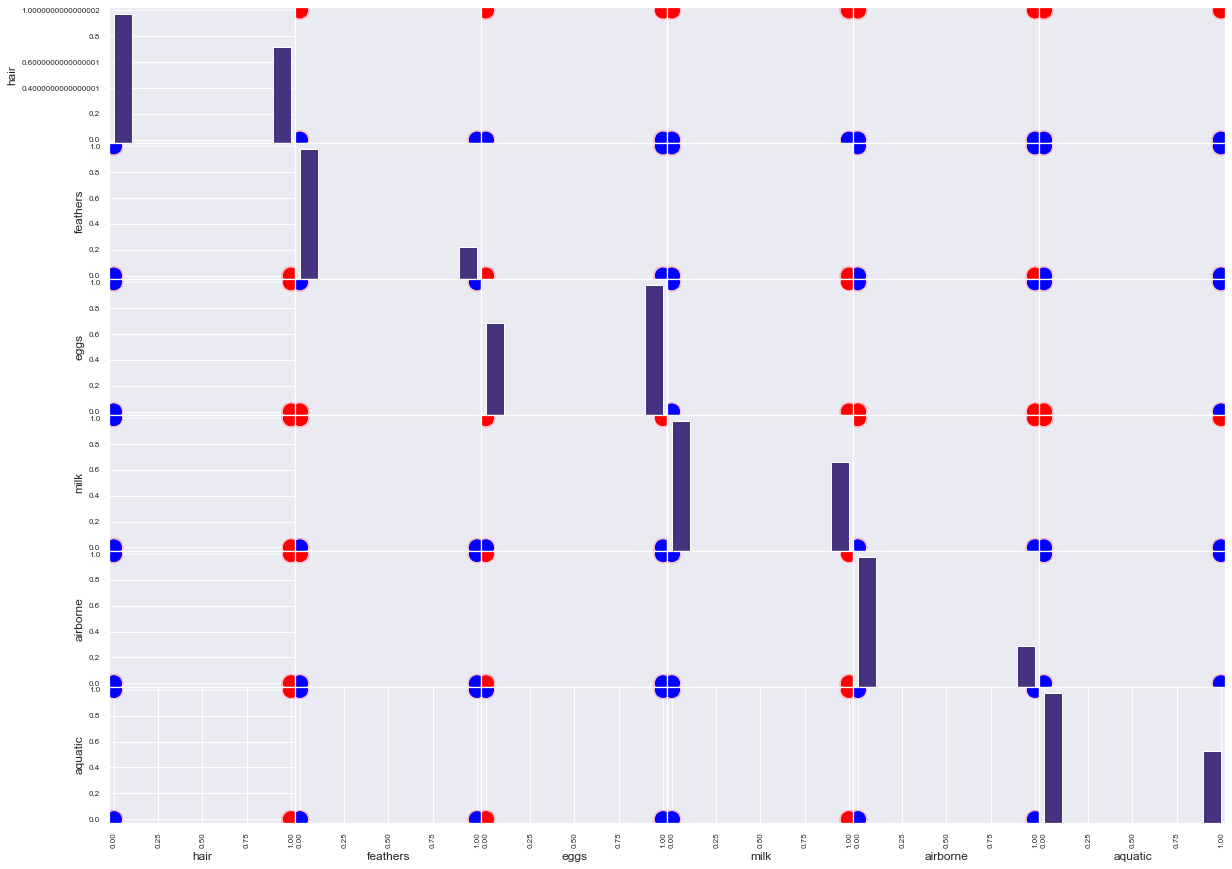

In [90]:
pd.plotting.scatter_matrix(df.iloc[:,:7],
                          c=color_list,
                          figsize=[20,15],
                          diagonal='hist',
                          alpha=1,
                          s=300,
                          marker='-+',
                          edgecolor='pink')
plt.show()

# check outlier

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type'>

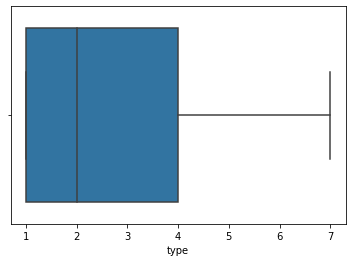

In [21]:
sns.boxplot(df['type'])

# KNN Model

# Grid Search for Algorithm tunning

In [60]:
x=df.iloc[:,1:17]
y=df.iloc[:,-1]

In [61]:
n_neighbors=list(range(1,41))
parameters={'n_neighbors':n_neighbors}

In [63]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=parameters)
grid.fit(x,y)

C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [68]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


In [70]:
model=KNeighborsClassifier(n_neighbors=1)

In [71]:
model.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [72]:
kfold=KFold(n_splits=10)
results=cross_val_score(model,x,y,cv=kfold)

In [73]:
results

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.9, 1. , 0.9])

In [74]:
results.mean()

0.9800000000000001

# Visualizing the CV results

In [81]:
k_range=range(1,41)
k_scores=[]

In [82]:
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=5)
    k_scores.append(scores.mean())

C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Hp\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 4 members, whi

In [83]:
k_scores

[0.97,
 0.9199999999999999,
 0.93,
 0.9004761904761904,
 0.8509523809523811,
 0.8509523809523811,
 0.8414285714285714,
 0.8014285714285714,
 0.7919047619047619,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.7419047619047618,
 0.7228571428571429,
 0.7128571428571429,
 0.7028571428571427,
 0.7028571428571427,
 0.7028571428571427,
 0.7028571428571427,
 0.6928571428571428,
 0.6928571428571428,
 0.6128571428571428,
 0.5928571428571429,
 0.5738095238095238,
 0.5738095238095238,
 0.5738095238095238,
 0.5738095238095238,
 0.5738095238095238,
 0.5738095238095238,
 0.5738095238095238,
 0.5638095238095238,
 0.5638095238095238]

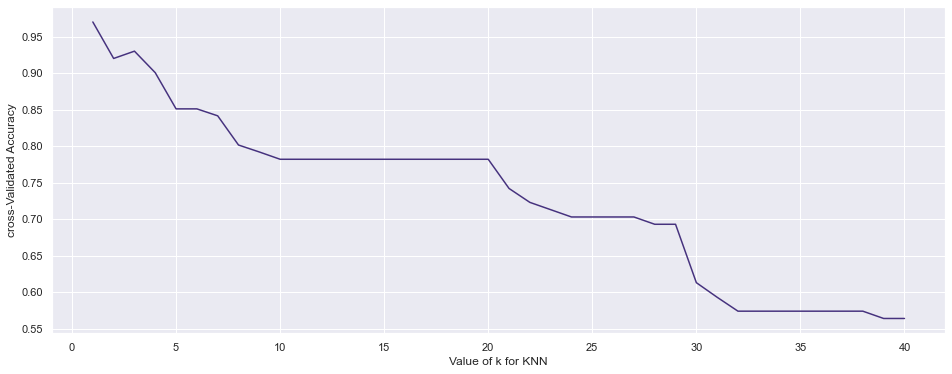

In [86]:
plt.figure(figsize=(16,6))
plt.plot(k_range,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('cross-Validated Accuracy')
plt.show()

In [87]:
df_accuracy=pd.DataFrame({'Value of k':range(1,41),
                         'Accuracy':k_scores})
df_accuracy

,Value of k,Accuracy
0,1,0.970000
1,2,0.920000
2,3,0.930000
3,4,0.900476
4,5,0.850952
5,6,0.850952
6,7,0.841429
7,8,0.801429
8,9,0.791905
9,10,0.781905
